### GROUP 4
#### Ama Serwaa Akoto
#### Esther Ameley Mensah
#### Erica Akanko
#### Madalyn Webb
#### Rita Obaze

# FoodHub Data Analysis


### Problem Statement / Business Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To ignore all warnings:
warnings.filterwarnings("ignore")

### Import your data

In [3]:
# read csv file
df = pd.read_csv('foodhub_order.csv')
# preview dataset
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


### Do sanity checks on the data

In [4]:
# preview the first 5 rows of dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
# preview the last 5 rows of the dataset
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [6]:
# get data shape
df.shape

(1898, 9)

In [7]:
# Check data types of each variable
data_types = df.dtypes
print(data_types)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


In [8]:
# get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [9]:
# get number of unique values in restaurant_name
df['restaurant_name'].nunique()

178

In [10]:
# get unique values of cuisine types
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [11]:
# get unique values in day of the week column
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [12]:
# get unique value of rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [13]:
# check for duplicates in dataset
df.duplicated().sum()

0

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [15]:
# Calculate summary statistics for numeric variables
summary_stats = df.describe()
print(summary_stats)


           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


In [16]:
# Calculate summary statistics for categrorical variables
summary_stat = df.describe(include=object)
print(summary_stat)


       restaurant_name cuisine_type day_of_the_week     rating
count             1898         1898            1898       1898
unique             178           14               2          4
top        Shake Shack     American         Weekend  Not given
freq               219          584            1351        736


#### Conducting these sanity checks on datasets gives a general overview and exposes some of the dataset constaints. This is very essential for ensuring data quality and understanding the data in general 

## Questions for guidance.
The questions or tasks below are meant to guide you to extract insight for the business. You are encourage to ask more questions.


### **Question 1:** How many orders are not rated?

In [17]:
# Count the number of orders where the 'rating' column has the value 'Not given'
not_rated_count = (df['rating'] == 'Not given').sum()

# Print the count of orders that are not rated
print(f'{not_rated_count} orders are not rated')


736 orders are not rated


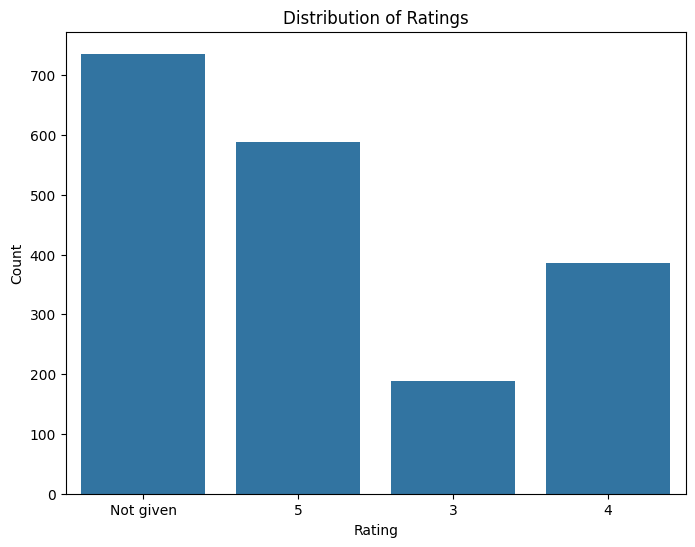

In [18]:
# Set the figure size
plt.figure(figsize=(8, 6))
# Create a count plot using seaborn's countplot function
# Specify the DataFrame (df) and the variable to plot on the x-axis ('rating')
sns.countplot(data=df, x='rating')
# Add labels to the axes
plt.xlabel('Rating') 
plt.ylabel('Count')   
# Title for the plot
plt.title('Distribution of Ratings')  
# Display the plot
plt.show()

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 2:** Explore all the variables and provide observations on their distributions. (Choose appropriate plots as you wish)

#### Univariate Analysis for Restaurants

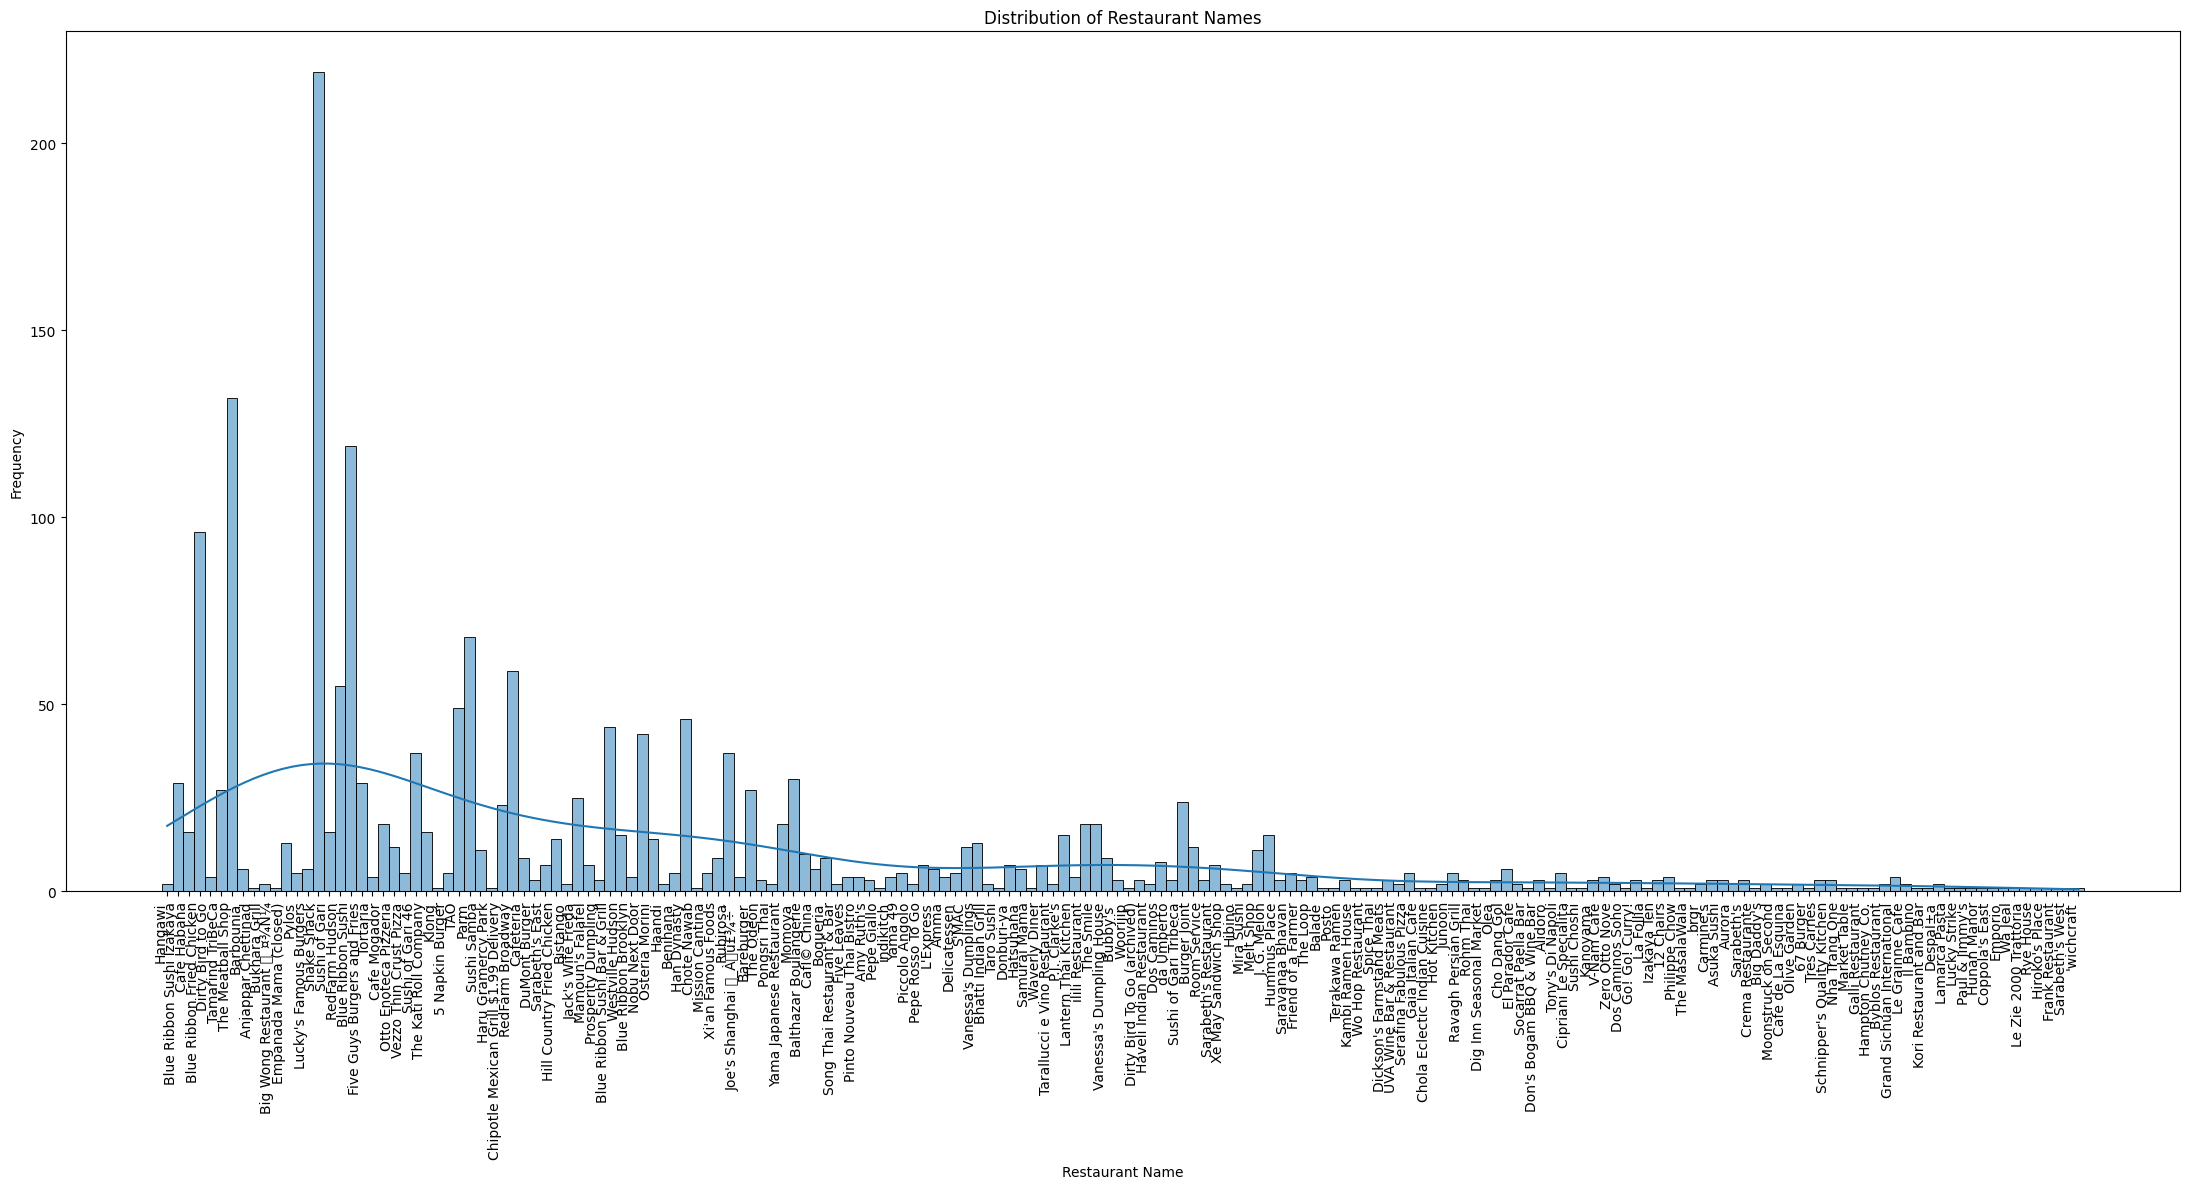

In [19]:
# Set the figure size
plt.figure(figsize=(22, 12))
# Create a histogram with KDE plot for the distribution of restaurant names
sns.histplot(data=df, x='restaurant_name', kde=True, palette='viridis')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')
# Add labels to the axes
plt.xlabel('Restaurant Name')  # Label for the x-axis
plt.ylabel('Frequency')         # Label for the y-axis
# Set the title of the plot
plt.title('Distribution of Restaurant Names')
# Adjust layout to prevent overlapping of labels
plt.tight_layout()
# Display the plot
plt.show()

#### Univariate Analysis for Cuisine Types

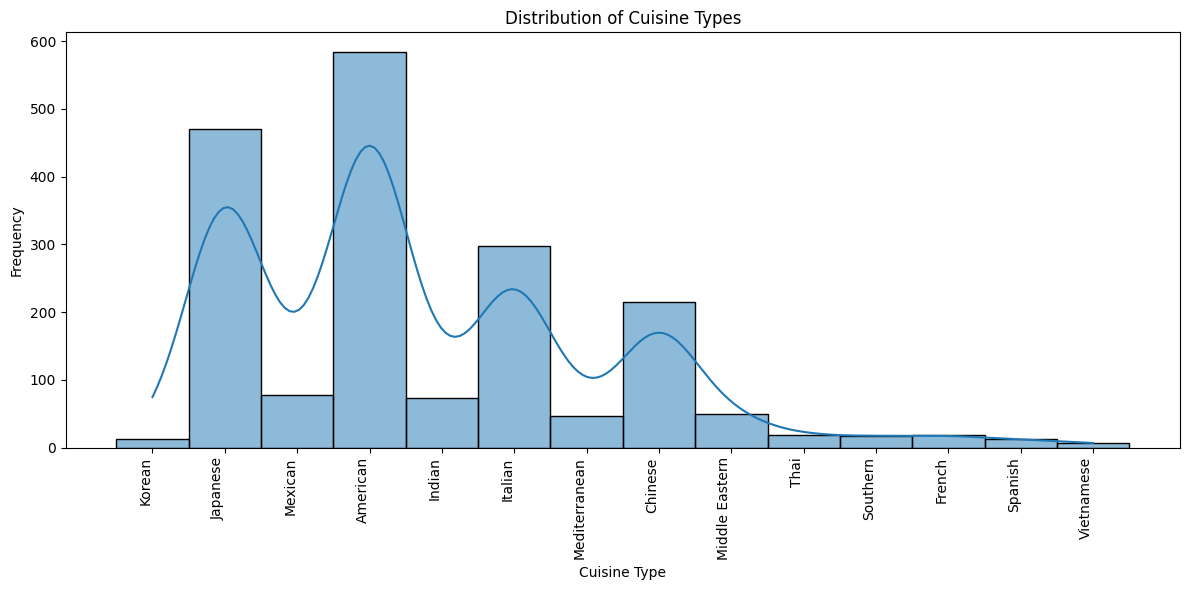

In [20]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Create a histogram or KDE plot for the distribution of cuisine types
sns.histplot(data=df, x='cuisine_type', kde=True)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')
# Add labels to the axes
plt.xlabel('Cuisine Type')  # Label for the x-axis
plt.ylabel('Frequency')      # Label for the y-axis
# Set the title of the plot
plt.title('Distribution of Cuisine Types')
# Adjust layout to prevent overlapping of labels
plt.tight_layout()
# Display the plot
plt.show()

#### Univariate Analysis for Day of the week

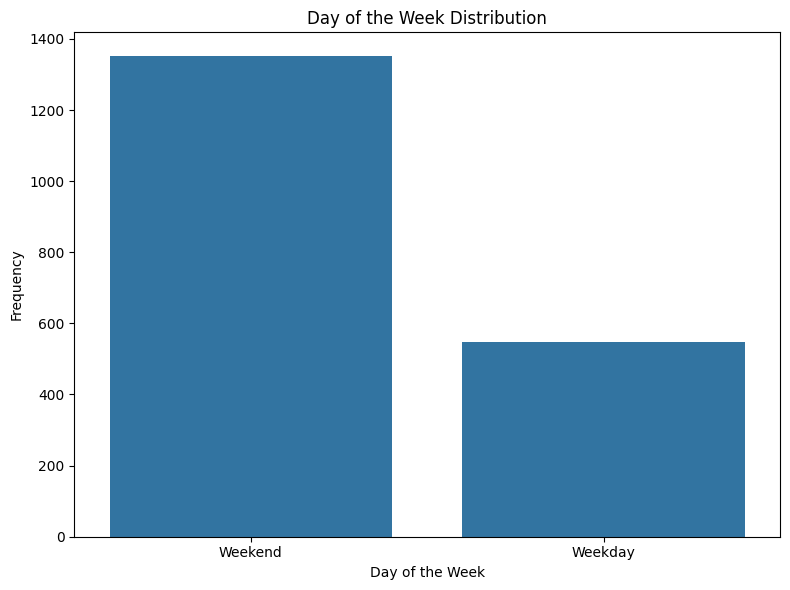

In [21]:
# Set the figure size
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='day_of_the_week')
# Add labels to the axes
plt.xlabel('Day of the Week') 
plt.ylabel('Frequency')       
# Set the title of the plot
plt.title('Day of the Week Distribution')
# Adjust layout to prevent overlapping of labels
plt.tight_layout()
# Display the plot
plt.show()

#### Univariate Analysis for Rating

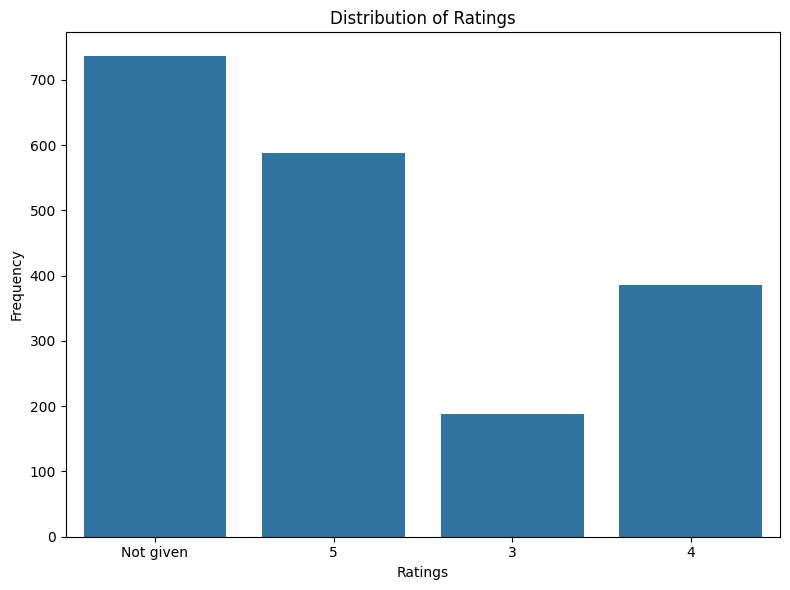

In [22]:

# Set the figure size
plt.figure(figsize=(8, 6))
# Create a count plot using seaborn's countplot function
sns.countplot(data=df, x='rating')
# Add labels to the axes
plt.xlabel('Ratings')      
plt.ylabel('Frequency')     
# Set the title of the plot
plt.title('Distribution of Ratings')
# Adjust layout to prevent overlapping of labels
plt.tight_layout()
# Display the plot
plt.show()

#### Univariate Analysis for Cost of Order

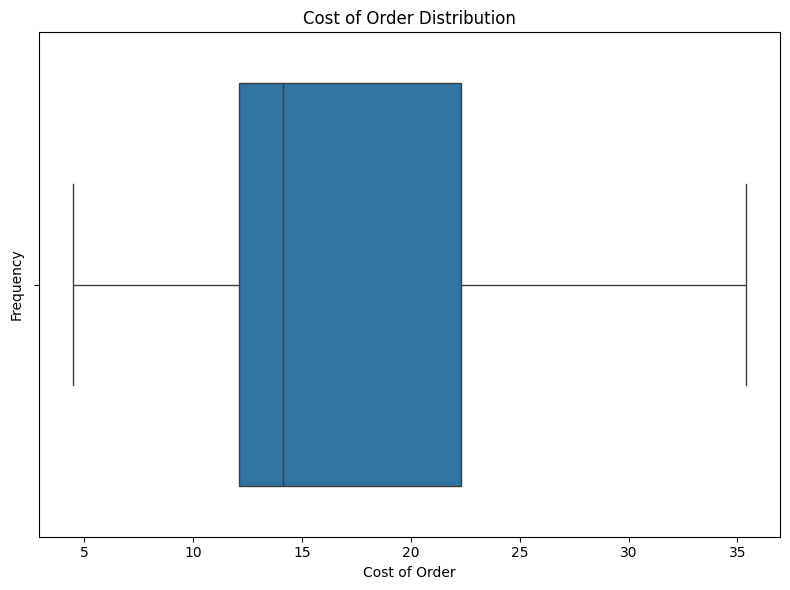

In [23]:
# Set the figure size
plt.figure(figsize=(8, 6))
# Create a box plot for the distribution of the cost of order
sns.boxplot(data=df, x='cost_of_the_order')
# Add labels to the axes
plt.xlabel('Cost of Order') 
plt.ylabel('Frequency')    
# Set the title of the plot
plt.title('Cost of Order Distribution')
# Adjust layout to prevent overlapping of labels
plt.tight_layout()
# Display the plot
plt.show()

### **Question 3**: Which are the top 5 restaurants in terms of the number of orders received?

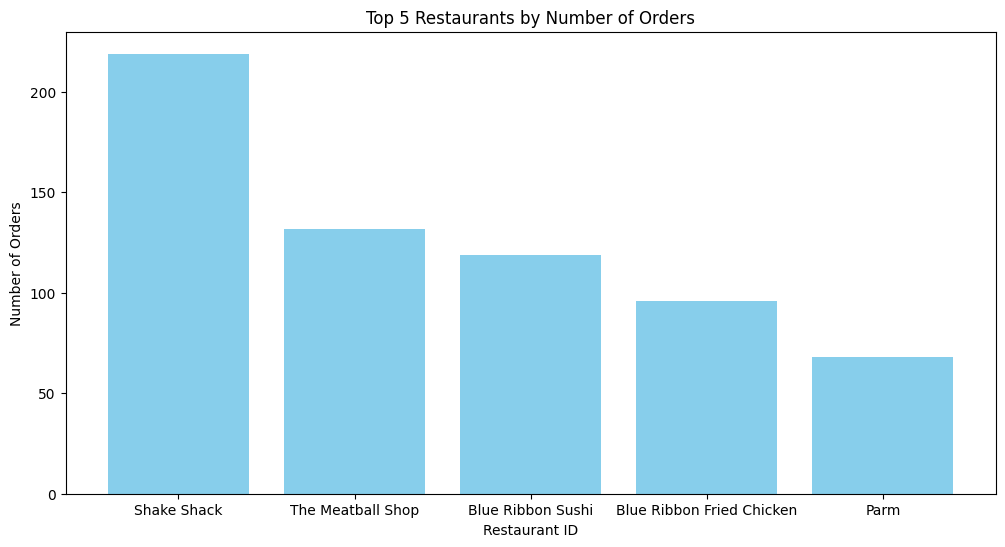

In [24]:

# Group by restaurant_id and count the number of orders for each restaurant
restaurant_orders = df.groupby('restaurant_name').size().reset_index(name='order_count')
# Sort restaurants based on the number of orders (descending order)
top_restaurants = restaurant_orders.sort_values(by='order_count', ascending=False)
# Select the top 5 restaurants
top_5_restaurants = top_restaurants.head(5)
# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_5_restaurants['restaurant_name'], top_5_restaurants['order_count'], color='skyblue')
plt.xlabel('Restaurant ID')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xticks(top_5_restaurants['restaurant_name'])
plt.show()

### **Question 4**: Which is the most popular cuisine on weekends?

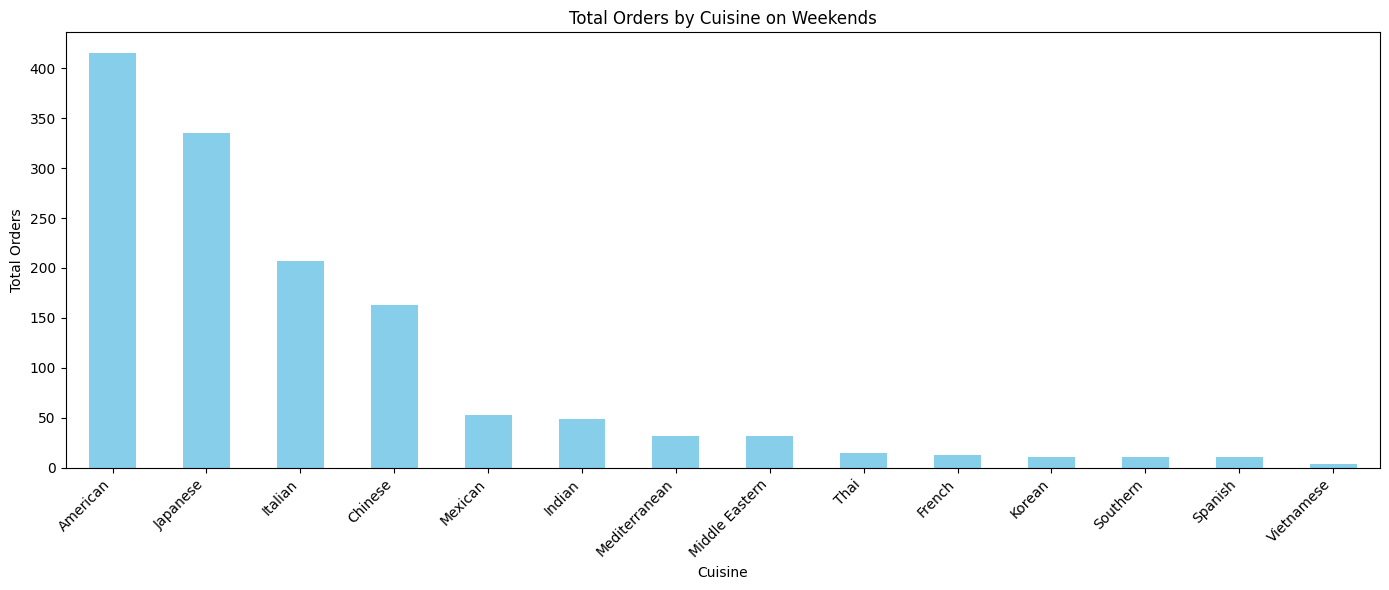

In [25]:
# Filter the data to include only weekends
weekend_orders = df[df['day_of_the_week']== 'Weekend']
# Group the filtered data by cuisine type and sum the number of orders for each cuisine
cuisine_orders_weekend = weekend_orders.groupby('cuisine_type')['order_id'].count()
# Sort the cuisine orders on weekends in descending order
cuisine_orders_weekend_sorted = cuisine_orders_weekend.sort_values(ascending=False)
cuisine_orders_weekend_sorted
# # plot bar chart
plt.figure(figsize=(14, 6))
cuisine_orders_weekend_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Orders by Cuisine on Weekends')
plt.xlabel('Cuisine')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Question 5**: What percentage of the orders cost more than 20 dollars?

In [26]:
# Count the number of orders where the cost of the order is greater than 20
order_more_20 = df['cost_of_the_order'] > 20
# Sum the values to get the total number of orders with cost greater than 20
order_more_20_number = order_more_20.sum()
# Count the total number of orders
total_orders = df['cost_of_the_order']
# Get the total count of orders
total_orders_number = total_orders.count()
# Calculate the percentage of orders with cost greater than 20
percentage_order_more_20 = (order_more_20_number / total_orders_number) * 100
# Round up the percentage value
percentage_rounded = percentage_order_more_20.round()
# Print the results
print(f'{percentage_rounded}% of the orders cost more than 20 dollars')


29.0% of the orders cost more than 20 dollars


### **Question 6**: What is the mean order delivery time?

In [27]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
mean_time_rounded = mean_delivery_time.round()
# Print the mean delivery time
print(f'The mean delivery time is {mean_time_rounded}')

The mean delivery time is 24.0


### **Question 7:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Count the number of orders for each customer
customer_orders = df['customer_id'].value_counts()
# Print a message indicating the following output will show customers who ordered the most
print('These are the customers who ordered the most')
# Display the top 3 customers with the most orders
print(customer_orders.head(3))

These are the customers who ordered the most
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


## Bivariate/Multivariate Analysis

### **Question 8**: Perform a bivariate/multivariate analysis to explore relationships between the important variables in the dataset.


#### Bivariate Analysis for Day of the week and Cost of order

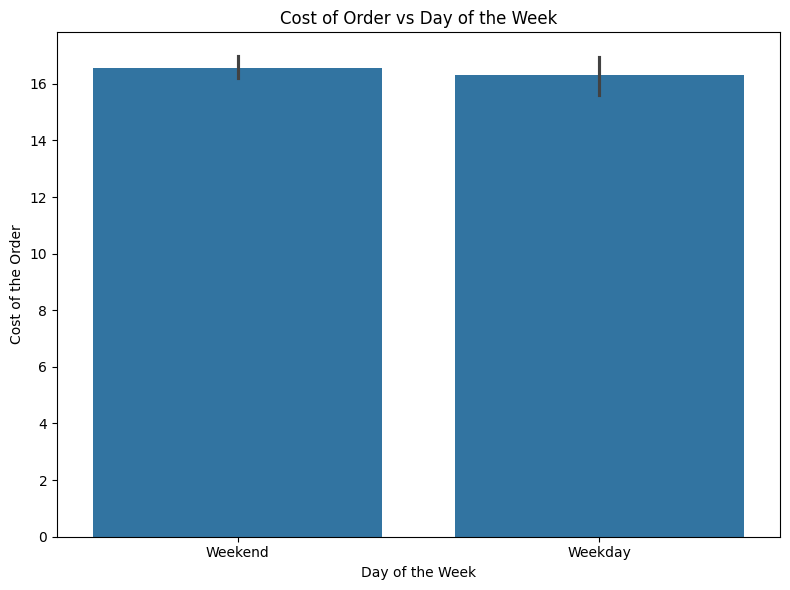

In [29]:
# Set the figure size
plt.figure(figsize=(8, 6))
# Create a bar plot using seaborn's barplot function
sns.barplot(data=df, x='day_of_the_week', y='cost_of_the_order')
# Add labels to the axes
plt.xlabel('Day of the Week')  
plt.ylabel('Cost of the Order') 
# Set the title of the plot
plt.title('Cost of Order vs Day of the Week')
# Adjust layout to prevent overlapping of labels
plt.tight_layout()
# Display the plot
plt.show()


#### Bivariate Analysis for Cost of order and Cuisine type

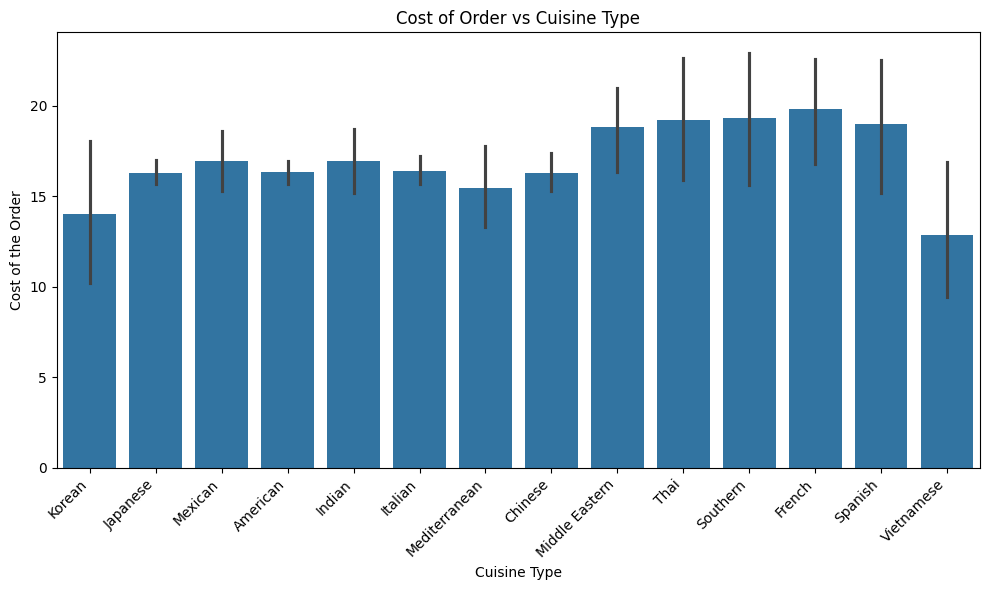

In [30]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a bar plot using seaborn's barplot function
sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Add labels to the axes
plt.xlabel('Cuisine Type')    
plt.ylabel('Cost of the Order')  
# Set the title of the plot
plt.title('Cost of Order vs Cuisine Type')
# Adjust layout to prevent overlapping of labels
plt.tight_layout()
# Display the plot
plt.show()

#### Bivariate Analysis for Cost of order and Rating

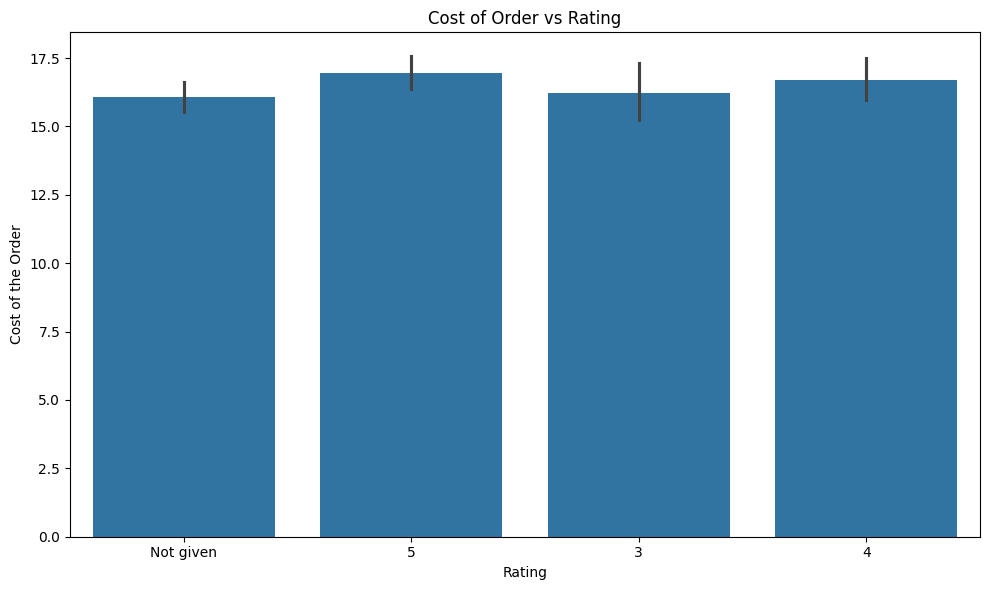

In [31]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a bar plot using seaborn's barplot function
sns.barplot(data=df, x='rating', y='cost_of_the_order')
# Add labels to the axes
plt.xlabel('Rating')         
plt.ylabel('Cost of the Order')
# Set the title of the plot
plt.title('Cost of Order vs Rating')
# Adjust layout to prevent overlapping of labels
plt.tight_layout()
# Display the plot
plt.show()

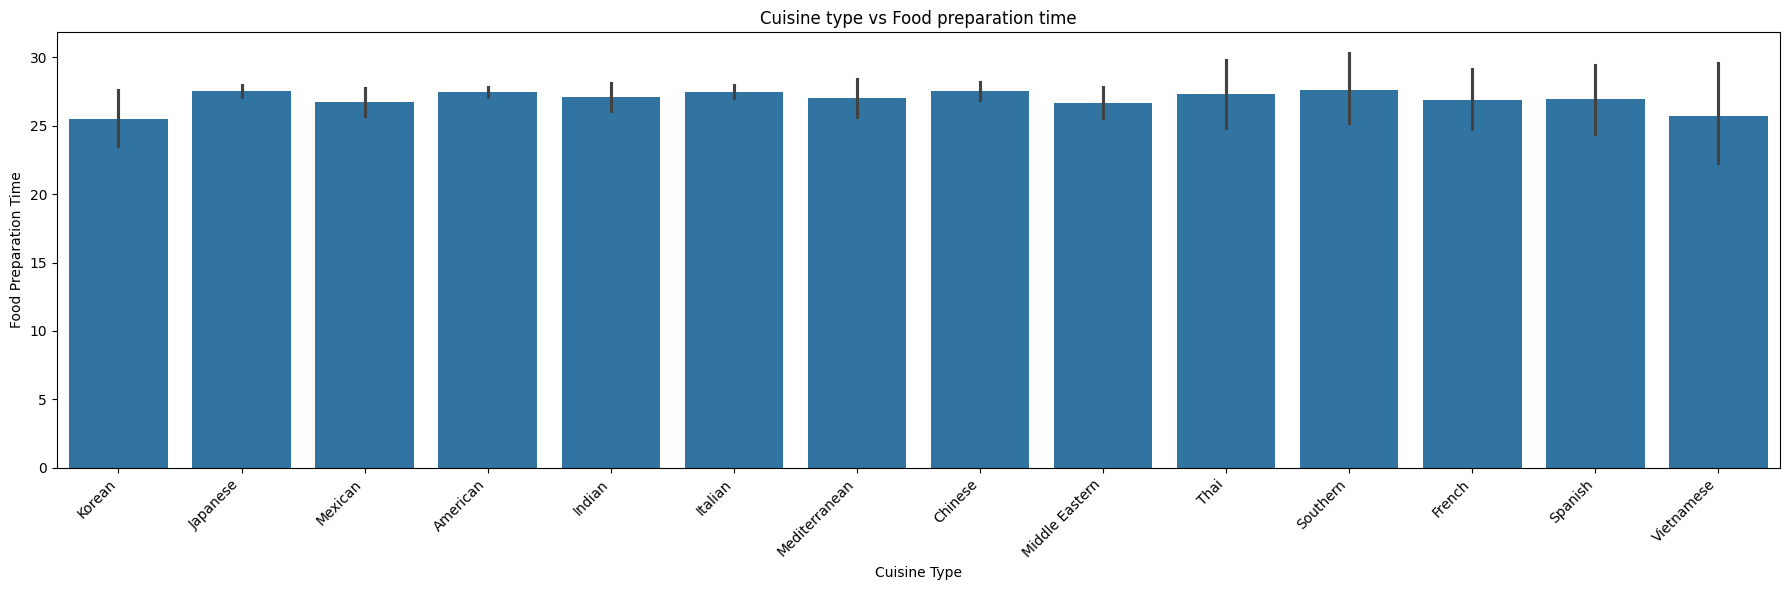

In [32]:
# Set the figure size
plt.figure(figsize=(18, 6))
# Creating a bar plot to visualize the relationship between Cuisine Type and Food Preparation Time
sns.barplot(data=df, x='cuisine_type', y='food_preparation_time')
# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right') 
# Labeling the x-axis, y-axis, and giving a title to the plot
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.title('Cuisine type vs Food preparation time')
# Adjusting layout for better visualization
plt.tight_layout()  
# Displaying the plot
plt.show()

### **Question 9:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:

# Convert 'rating' column to numerical datatype
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Calculate average rating for each restaurant
average_ratings = df.groupby('restaurant_name')['rating'].mean()

rating_count = df.groupby('restaurant_name')['rating'].count()
rating_count
# Filter restaurants with a rating count of more than 50
filtered_ratings = rating_count[rating_count > 50]

# Filter restaurants with an average rating greater than 4
promotional_restaurants = filtered_ratings[(average_ratings > 4)]

# Get the names of the promotional restaurants
promotional_restaurants = promotional_restaurants.index.to_list()


print(f'The restaurants that meeet this condition are {promotional_restaurants}')

The restaurants that meeet this condition are ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


### **Question 10:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [36]:
# Select orders where the cost of the order is greater than 20 and calculate 25% of the cost
orders_greater_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25
# Select orders where the cost of the order is greater than 5 and calculate 15% of the cost
orders_greater_5 = df[df['cost_of_the_order'] > 5]['cost_of_the_order'] * 0.15
# Calculate the net revenue by summing up the revenues from orders greater than 20 and orders greater than 5
net_revenue = orders_greater_20.sum() + orders_greater_5.sum()
# Round the net revenue to the nearest integer
net_revenue_rounded = net_revenue.round()
print(net_revenue_rounded)

8380.0


### **Question 11:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [37]:
# Calculate the total time for each order by summing food preparation time and delivery time
total_time = df['food_preparation_time'] + df['delivery_time']
# Select orders with a total time greater than 60 minutes
total_time_60 = total_time[total_time > 60]
# Count the number of orders with a total time greater than 60 minutes
total_time_60_count = total_time_60.count()
# Calculate the total number of orders
total_orders = df['cost_of_the_order']
total_orders_number = total_orders.count()
# Calculate the percentage of orders with a total time greater than 60 minutes
total_time_60_percentage = (total_time_60_count / total_orders_number) * 100
total_time_60_percentage


10.537407797681771

### **Question 12:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

The mean delivery times are day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


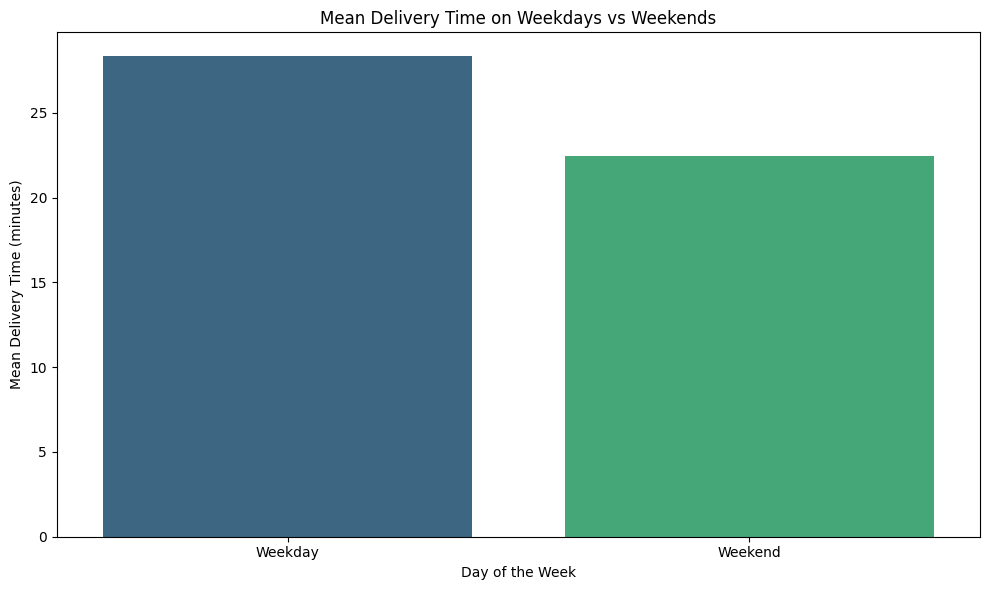

In [42]:
# Set figure size
plt.figure(figsize=(10, 6))
# Group the data by day of the week and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(f'The mean delivery times are {mean_delivery_time}')
# Plot the mean delivery time for each day of the week
sns.barplot(x=mean_delivery_time.index, y=mean_delivery_time.values, palette='viridis')
# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time (minutes)')
plt.title('Mean Delivery Time on Weekdays vs Weekends')
# Show plot
plt.tight_layout()
plt.show()


## Conclusion and Recommendations

### **Question 13:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Recommendations:

#### 1.  From the plot of Orders by Cuisine types on weekends, it was observed that American cuisines were ordered most followed by Japanese and Chinese. We recommend that the food aggregator company should prioritise these cuisine types. Also they should collaborate with the various resturants to have special promotions and discounts for the cuisines that are less patronised during weekends (i.e. Vietnamese, Spanish, Southern among others).

#### 2. From the analysis, the top five resturants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm. The food aggregator company should collaborate with these restaurants to implement quality control measures to ensure consistency in food quality and services. This will increase customer patronage thereby, increasing revenue.

#### 3. From the analysis, it was observed that most customers do not like to give ratings. The food aggregator company should collaborate with restaurants to give discounts to customers who rate consistently. This will encourage other customers to give their ratings often.

#### 4. Food aggregator companies should encourage restaurants to optimise their menus based on popular cuisine types and customer preferences.

#### 5. Due to high demands on weekends, the food aggregator company should prioritise restaurants that have the capacity to handle high order volumes during weekends. 

### Conclusions:
####  In summary, this analysis provides actionable insights that empower the food aggregator company to make informed decisions regarding business strategies, menu planning, customer engagement, quality improvement, and competitive positioning. By leveraging these insights effectively, the company can enhance customer satisfaction, drive sales, and foster long-term success in a competitive industry landscape.

---